# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

*17*

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,  ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from time import process_time
from sklearn import tree

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

*The dataset is not missing values but there are several catagorial featrues that will need to be encoded.*

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

*The business goal is to increase long-term deposits of the bank using a targeted marketing canpaign.  The approach is to use data mining (DM)techniques to find patterns that identify the characteristics of customers who buy the banks offers and DM is being used to increase the precision of that outreach, with the hope of reducing the nubmer of contacts made, but keeping the number of new deposits the same, thus increasing efficiency and reducing the cost of the campaign.*

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

Extact features indicated in assignment and rename target column

In [6]:
df2 = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']].copy()

In [7]:
df2

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes


In [8]:
df2.rename(columns={'y': 'deposit'}, inplace=True)

In [9]:
df2.head()

,age,job,marital,education,default,housing,loan,deposit
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


Convert target values to numeric

In [10]:
df2['deposit'] = df2['deposit'].map({'yes': 1, 'no': 0})

In [11]:
df2.sample(n=25)

,age,job,marital,education,default,housing,loan,deposit
36706,52,admin.,married,university.degree,no,yes,no,0
36608,36,management,married,university.degree,no,no,no,1
11933,56,technician,married,unknown,no,no,yes,1
22033,31,technician,married,university.degree,unknown,no,no,0
17921,54,entrepreneur,divorced,high.school,unknown,no,yes,0
24459,46,admin.,married,university.degree,unknown,no,no,0
3874,35,blue-collar,married,basic.4y,no,yes,no,0
16276,48,entrepreneur,single,university.degree,no,no,yes,0
23995,58,retired,married,basic.4y,no,yes,yes,0
19133,58,technician,married,professional.course,unknown,no,no,0


Encode catagorical features

In [12]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
cat_features_df = pd.DataFrame(df2[cat_features])
dummies = pd.get_dummies(cat_features_df)

In [13]:
df_enc = pd.concat([df2, dummies], axis=1)

In [14]:
df_enc.drop(cat_features, axis=1, inplace=True)

Move target to end

In [15]:
temp_cols = df_enc.columns.tolist()
index = df_enc.columns.get_loc('deposit')
new_cols = temp_cols[0:index] + temp_cols[index+1:] + temp_cols[index:index+1] 
df_enc = df_enc[new_cols]

In [16]:
df_enc.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,deposit
0,56,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,57,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
2,37,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
3,40,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,56,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


EDA

In [17]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   job_admin.                     41188 non-null  uint8
 2   job_blue-collar                41188 non-null  uint8
 3   job_entrepreneur               41188 non-null  uint8
 4   job_housemaid                  41188 non-null  uint8
 5   job_management                 41188 non-null  uint8
 6   job_retired                    41188 non-null  uint8
 7   job_self-employed              41188 non-null  uint8
 8   job_services                   41188 non-null  uint8
 9   job_student                    41188 non-null  uint8
 10  job_technician                 41188 non-null  uint8
 11  job_unemployed                 41188 non-null  uint8
 12  job_unknown                    41188 non-null  uint8
 13  marital_divorced

In [18]:
df_enc['deposit'].value_counts()

0    36548
1     4640
Name: deposit, dtype: int64

We have a class imbalance

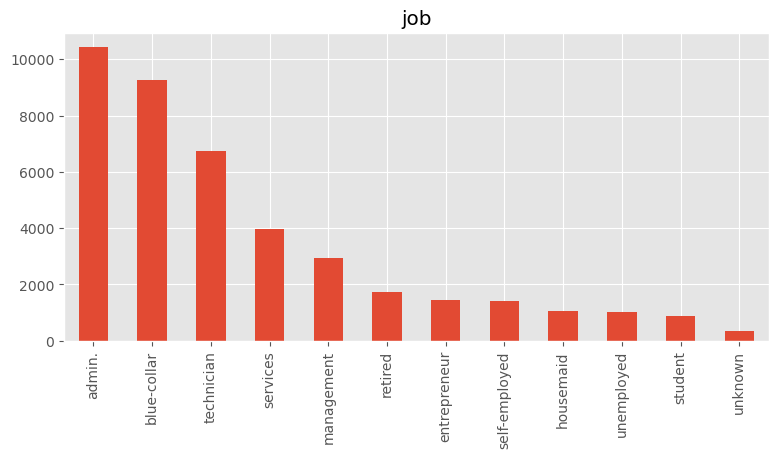

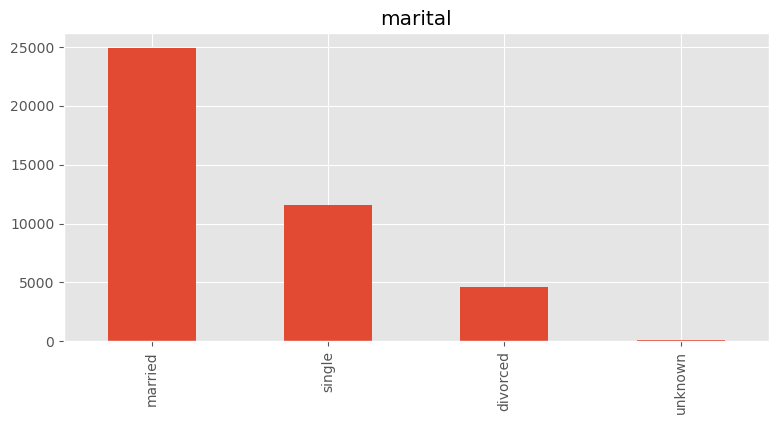

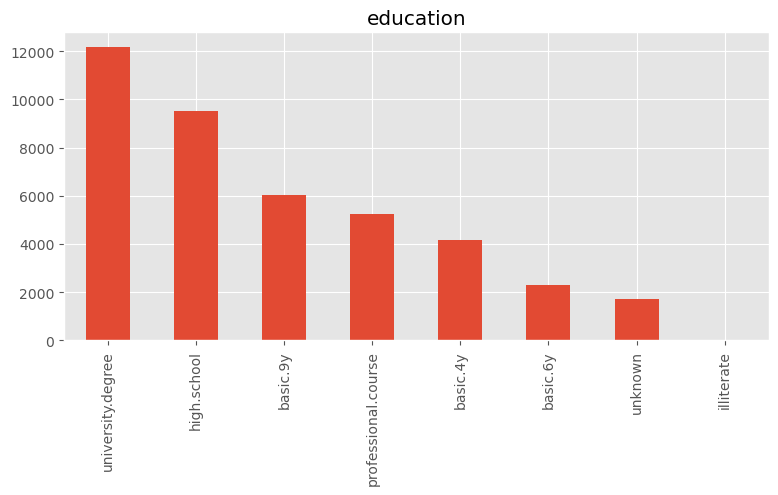

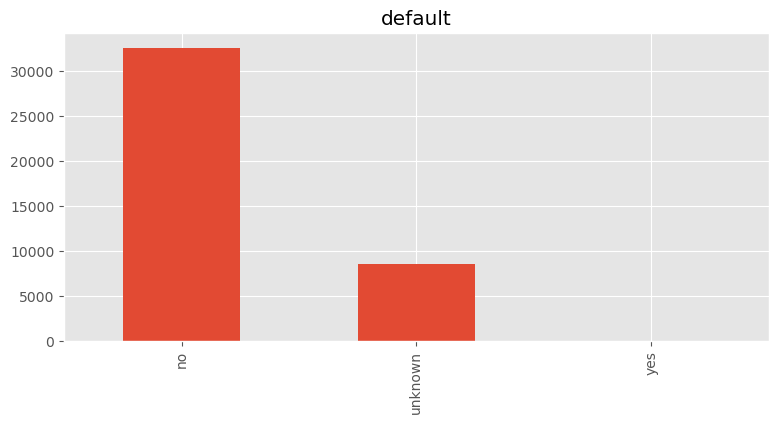

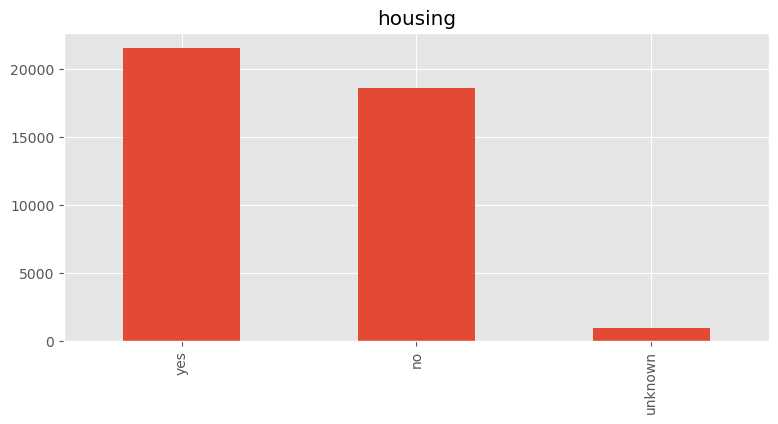

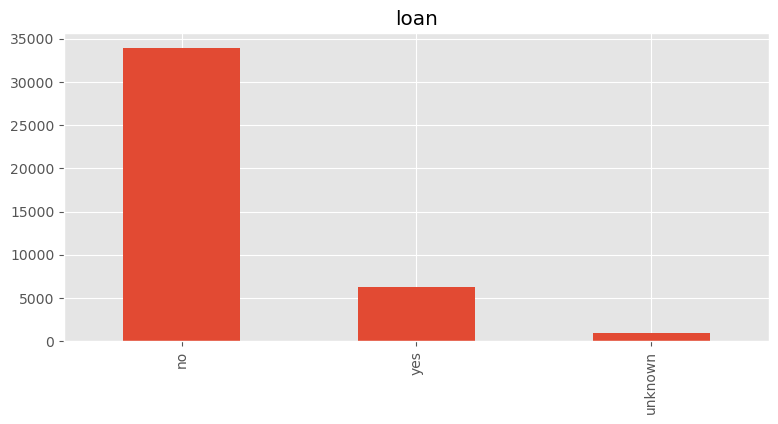

In [123]:
plt.style.use('ggplot')

for column in cat_features:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df2[column].value_counts().plot(kind='bar')
    plt.title(column)

<Axes: >

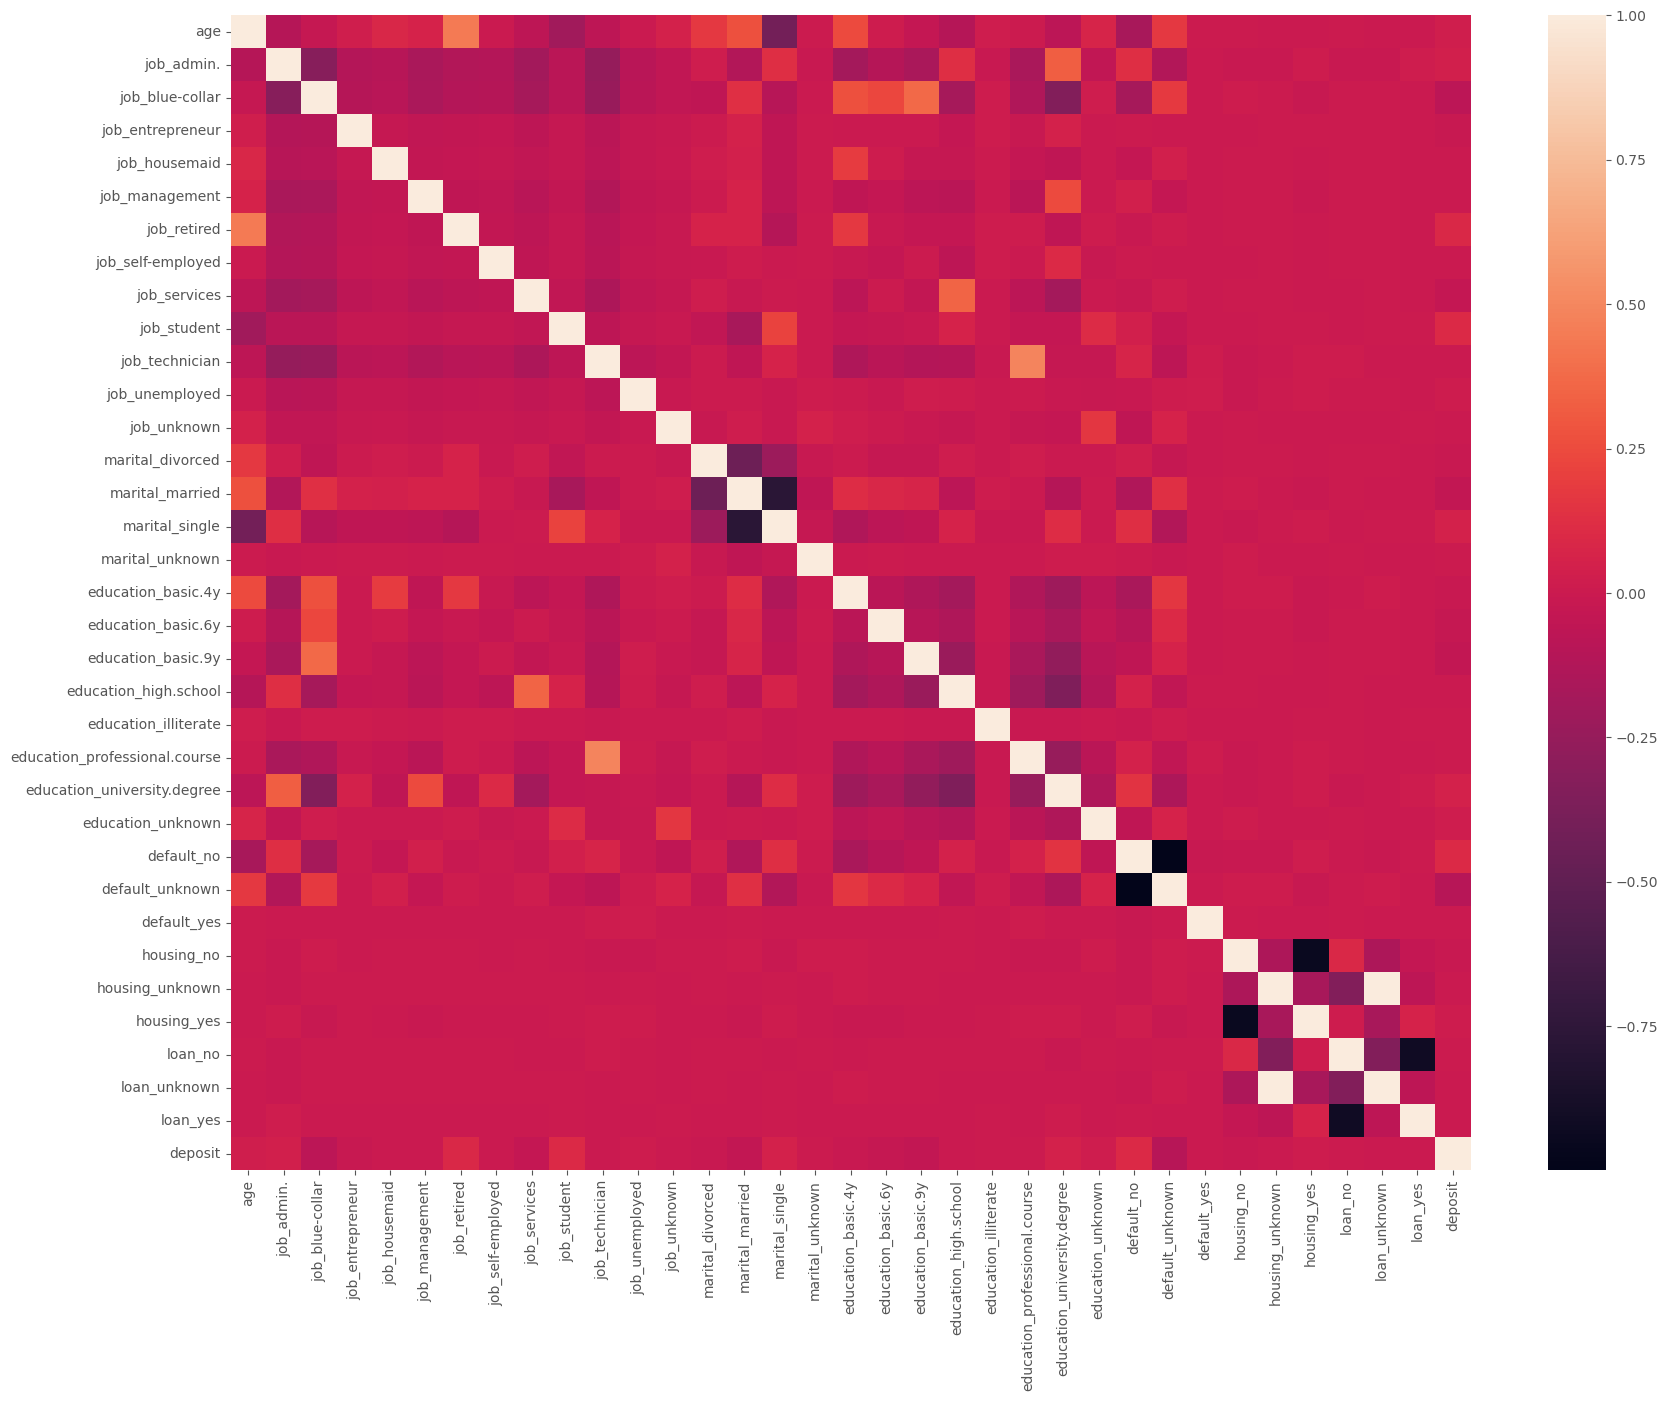

In [20]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_enc.corr())

One interesting thing to be gleaned from this heatmap is the the 'housing' and 'loan' features don't apprear to be all that important

In [ ]:
Decision 

for column in cat_features:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=df2[column],hue=df2['deposit'],data=df2)
    plt.title(column)    
    plt.xticks(rotation=90)

Looking for intersting features, we can see the patterns in job(admin, technician, and blue-collar), education (university degree), not being in default and not having a loan.  Housing and marital status don't appear to have much differentiation.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

Split out target

In [22]:
X = df_enc.drop(['deposit'], axis=1).values
y = df_enc['deposit'].values

Split dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Now create a smaller feature set based on the EDA observation, focusing on job, education and loan

In [ ]:
X2 = df_enc.drop(['marital_divorced','marital_married','marital_single', 'housing_no', 'housing_unknown','housing_yes','loan_no','loan_unknown', 'loan_yes', 'deposit'], axis=1).values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

For a baseline, going to uyse a simple linear regression using a subset of features.  Based on the bivaraite graphs, going to use job, education and default.

In [78]:
baseline_clf = ""
baseline_score = ""

baseline_clf = DummyClassifier()
t0 = process_time()
baseline_clf.fit(X2_train, y2_train)
t1 = process_time()
baseline_time = t1 - t0
baseline_score = baseline_clf.score(X2_test, y2_test) * 100

In [79]:
print('Baseline Score: %.3f' % baseline_score)

Baseline Score: 88.803


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [86]:
lgr = LogisticRegression()
t0 = process_time()
lgr.fit(X2_train, y2_train)
t1 = process_time()
lgr_time = t1 - t0

lgr_preds_train = lgr.predict(X2_train)
lgr_preds_test = lgr.predict(X2_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [89]:
lgr_acc_train = metrics.accuracy_score(y2_train, lgr_preds_train) * 100
print('Logistic Regression training accuracy: %.3f' % lgr_acc_train)
lgr_acc_test = metrics.accuracy_score(y2_test, lgr_preds_test) * 100
print('Logistic Regression test accuracy: %.3f' % lgr_acc_test)

Logistic Regression training accuracy: 88.712
Logistic Regression test accuracy: 88.803


<function matplotlib.pyplot.show(close=None, block=None)>

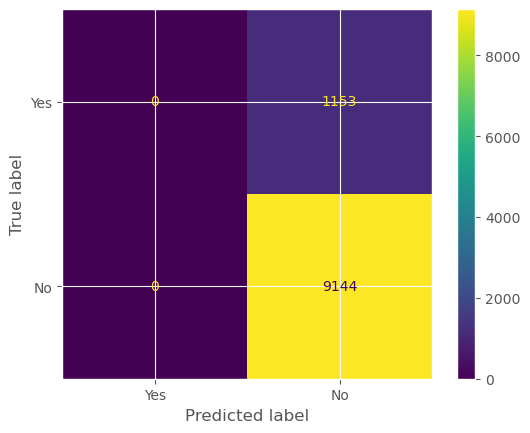

In [121]:
lgr_confusion_mat = confusion_matrix(y2_test, lgr_preds_test, labels=[1,0])
lgr_disp = ConfusionMatrixDisplay(confusion_matrix=lgr_confusion_mat, display_labels=['Yes', 'No' ])   
lgr_disp.plot()
plt.show

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

**KNN**

In [91]:
knn = KNeighborsClassifier() 
t0 = process_time()
knn.fit(X2_train, y2_train)
t1 = process_time()
knn_time = t1 - t0

knn_preds_train = knn.predict(X2_train)
knn_preds_test = knn.predict(X2_test)
knn_acc_train = metrics.accuracy_score(y2_train, knn_preds_train) * 100
print('KNN training accuracy: %.3f' % knn_acc_train)
knn_acc_test = metrics.accuracy_score(y2_test, knn_preds_test) * 100
print('KNN test accuracy: %.3f' % knn_acc_test)

KNN training accuracy: 88.997
KNN test accuracy: 88.356


<function matplotlib.pyplot.show(close=None, block=None)>

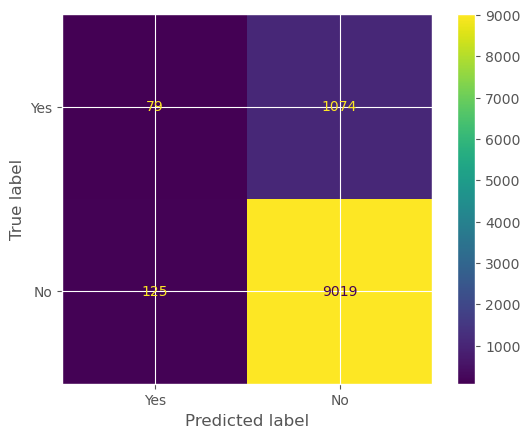

In [120]:
knn_confusion_mat = confusion_matrix(y2_test, knn_preds_test, labels=[1,0])
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_mat, display_labels=['Yes', 'No' ])   
knn_disp.plot()
plt.show

**SVM**

In [97]:
svm = SVC() 
t0 = process_time()
svm.fit(X2_train, y2_train)
t1 = process_time()
svm_time = t1 - t0

svm_preds_train = svm.predict(X2_train)
svm_preds_test = svm.predict(X2_test)
svm_acc_train = metrics.accuracy_score(y2_train, svm_preds_train) * 100
print('SVM training accuracy: %.3f' % svm_acc_train)
svm_acc_test = metrics.accuracy_score(y2_test, svm_preds_test) * 100
print('SVM test accuracy: %.3f' % svm_acc_test)

SVM training accuracy: 88.712
SVM test accuracy: 88.803


<function matplotlib.pyplot.show(close=None, block=None)>

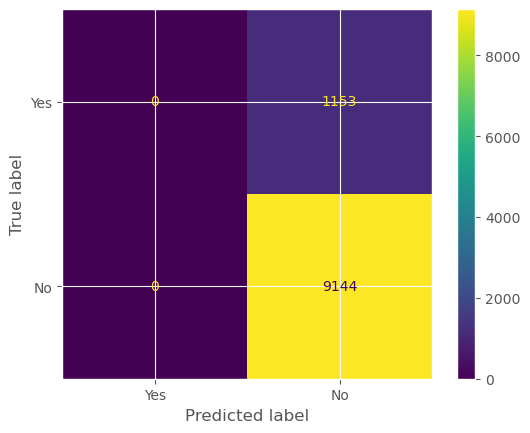

In [119]:
svm_confusion_mat = confusion_matrix(y2_test, svm_preds_test, labels=[1,0])
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_confusion_mat, display_labels=['Yes', 'No' ])   
svm_disp.plot()
plt.show

**Decision Tree**

In [99]:
dt = DecisionTreeClassifier() 
t0 = process_time()
dt.fit(X2_train, y2_train)
t1 = process_time()
dt_time = t1 - t0

dt_preds_train = dt.predict(X2_train)
dt_preds_test = dt.predict(X2_test)
dt_acc_train = metrics.accuracy_score(y2_train, dt_preds_train) * 100
print('Decision Tree training accuracy: %.3f' % dt_acc_train)
dt_acc_test = metrics.accuracy_score(y2_test, dt_preds_test) * 100
print('Decision Tree test accuracy: %.3f' % dt_acc_test)

Decision Tree training accuracy: 89.641
Decision Tree test accuracy: 88.550


<function matplotlib.pyplot.show(close=None, block=None)>

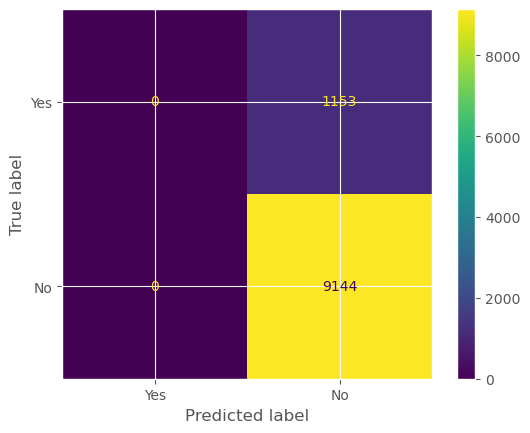

In [118]:
dt_confusion_mat = confusion_matrix(y2_test, dt_preds_test, labels=[1,0])
dt_disp = ConfusionMatrixDisplay(confusion_matrix=svm_confusion_mat, display_labels=['Yes', 'No' ])   
dt_disp.plot()
plt.show

In [103]:
results_data = [['Logistic Regression', lgr_acc_train, lgr_acc_test, lgr_time],
                ['KNN', knn_acc_train, knn_acc_test, knn_time],
                ['SVM', svm_acc_train, svm_acc_test, svm_time],
                ['Decision Tree', dt_acc_train, dt_acc_test, dt_time]]
results_df = pd.DataFrame(results_data, columns=['Model', 'Train Acc', 'Test Acc', 'Fit Time'])

In [104]:
results_df

,Model,Train Acc,Test Acc,Fit Time
0,Logistic Regression,88.711923,88.802564,2.059263
1,KNN,88.996795,88.355832,0.004277
2,SVM,88.711923,88.802564,3.474285
3,Decision Tree,89.640996,88.550063,0.066922


While SVM and Logistic Regression have the highest test accuracy, they are also the most compute intensive.  On the other hand, the Decision Tree has almost as high test accuracy at significantly lower compute cost.  That would be my recommendation at that seems to strike the best balance.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Let's try the decision tree with the full set of features

In [106]:
dt_full = DecisionTreeClassifier() 
t0 = process_time()
dt_full.fit(X_train, y_train)
t1 = process_time()
dt_full_time = t1 - t0

dt_full_preds_train = dt_full.predict(X_train)
dt_full_preds_test = dt_full.predict(X_test)
dt_full_acc_train = metrics.accuracy_score(y_train, dt_full_preds_train) * 100
print('Decision Tree training accuracy: %.3f' % dt_full_acc_train)
dt_full_acc_test = metrics.accuracy_score(y_test, dt_full_preds_test) * 100
print('Decision Tree test accuracy: %.3f' % dt_full_acc_test)
print('Decision Tree fit time: %.5f' % dt_full_time)

Decision Tree training accuracy: 91.697
Decision Tree test accuracy: 86.433
Decision Tree fit time: 0.09774


While training accuracy went up, the test accuracy actually went down, which liely means the model is now overfit.

Now, let play with the depth of the original tree

In [111]:
print('The depth of the original tree is: ', dt.tree_.max_depth)

The depth of the original tree is:  34


In [112]:
dt_none = DecisionTreeClassifier(max_depth=None) 
t0 = process_time()
dt_none.fit(X2_train, y2_train)
t1 = process_time()
dt_none_time = t1 - t0

dt_none_preds_train = dt_none.predict(X2_train)
dt_none_preds_test = dt_none.predict(X2_test)
dt_none_acc_train = metrics.accuracy_score(y2_train, dt_none_preds_train) * 100
print('Decision Tree (depth=none) training accuracy: %.3f' % dt_none_acc_train)
dt_none_acc_test = metrics.accuracy_score(y2_test, dt_none_preds_test) * 100
print('Decision Tree (depth=none) test accuracy: %.3f' % dt_none_acc_test)
print('Decision Tree (depth=none) fit time: %.5f' % dt_none_time)

Decision Tree (depth=none) training accuracy: 89.641
Decision Tree (depth=none) test accuracy: 88.550
Decision Tree (depth=none) fit time: 0.07166


In [114]:
dt_5 = DecisionTreeClassifier(max_depth=5) 
t0 = process_time()
dt_5.fit(X2_train, y2_train)
t1 = process_time()
dt_5_time = t1 - t0

dt_5_preds_train = dt_5.predict(X2_train)
dt_5_preds_test = dt_5.predict(X2_test)
dt_5_acc_train = metrics.accuracy_score(y2_train, dt_5_preds_train) * 100
print('Decision Tree (depth=5) training accuracy: %.3f' % dt_5_acc_train)
dt_5_acc_test = metrics.accuracy_score(y2_test, dt_5_preds_test) * 100
print('Decision Tree (depth=5) test accuracy: %.3f' % dt_5_acc_test)
print('Decision Tree (depth=5) fit time: %.5f' % dt_5_time)

Decision Tree (depth=5) training accuracy: 88.786
Decision Tree (depth=5) test accuracy: 88.764
Decision Tree (depth=5) fit time: 0.04079


In [115]:
dt_10 = DecisionTreeClassifier(max_depth=10) 
t0 = process_time()
dt_10.fit(X2_train, y2_train)
t1 = process_time()
dt_10_time = t1 - t0

dt_10_preds_train = dt_10.predict(X2_train)
dt_10_preds_test = dt_10.predict(X2_test)
dt_10_acc_train = metrics.accuracy_score(y2_train, dt_10_preds_train) * 100
print('Decision Tree (depth=10) training accuracy: %.3f' % dt_10_acc_train)
dt_10_acc_test = metrics.accuracy_score(y2_test, dt_10_preds_test) * 100
print('Decision Tree (depth=10) test accuracy: %.3f' % dt_10_acc_test)
print('Decision Tree (depth=10) fit time: %.5f' % dt_10_time)

Decision Tree (depth=10) training accuracy: 89.126
Decision Tree (depth=10) test accuracy: 88.744
Decision Tree (depth=10) fit time: 0.04893


In [116]:
dt_3 = DecisionTreeClassifier(max_depth=3) 
t0 = process_time()
dt_3.fit(X2_train, y2_train)
t1 = process_time()
dt_3_time = t1 - t0

dt_3_preds_train = dt_3.predict(X2_train)
dt_3_preds_test = dt_3.predict(X2_test)
dt_3_acc_train = metrics.accuracy_score(y2_train, dt_3_preds_train) * 100
print('Decision Tree (depth=3) training accuracy: %.3f' % dt_3_acc_train)
dt_3_acc_test = metrics.accuracy_score(y2_test, dt_5_preds_test) * 100
print('Decision Tree (depth=3) test accuracy: %.3f' % dt_3_acc_test)
print('Decision Tree (depth=3) fit time: %.5f' % dt_3_time)

Decision Tree (depth=3) training accuracy: 88.715
Decision Tree (depth=3) test accuracy: 88.764
Decision Tree (depth=3) fit time: 0.02632


Taking the tree depth down to 3 has neglibile impact on accuracy but greatly reduces compute time.

<function matplotlib.pyplot.show(close=None, block=None)>

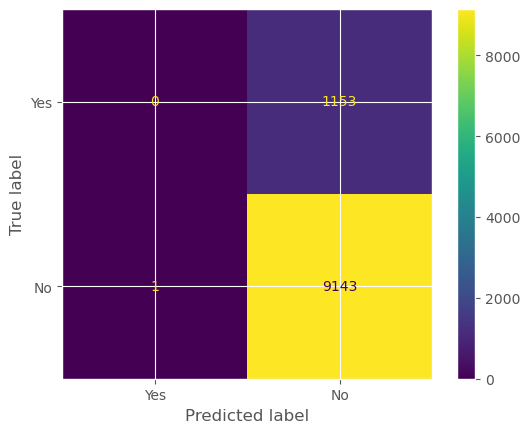

In [122]:
dt_3_confusion_mat = confusion_matrix(y2_test, dt_3_preds_test, labels=[1,0])
dt_3_disp = ConfusionMatrixDisplay(confusion_matrix=dt_3_confusion_mat, display_labels=['Yes', 'No' ])   
dt_3_disp.plot()
plt.show

##### Questions